# Semantic VS Syntatic

- Sagun Rupakheti 123431

In [123]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import nltk
nltk.__version__

'3.8.1'

In [3]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

### Load Data

In [4]:
from nltk.corpus import brown as b

In [5]:
type(b)

nltk.corpus.util.LazyCorpusLoader

In [6]:
corpus = b.sents()[:1000]

In [7]:
corpus_tokenized = corpus

### Tokenization

In [8]:
corpus_tokenized

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [9]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))

In [10]:
len(vocabs)

4641

In [11]:
vocabs.append('<UNK>') 

In [12]:
vocabs[-1]

'<UNK>'

### Numericalization

In [13]:
word2index = {v: idx for idx, v in enumerate(vocabs)}


In [14]:
word2index['<UNK>']

4641

## 1. Skipgram

In [15]:
#move along the corpus
#to fit with our corpus, we gonna use window_size = 1

skipgrams = []

#for each corpus
for sent in corpus_tokenized:
    #for each sent ["apple", "banana", "fruit"]
    for i in range(1, len(sent) - 1): #start from 1 to second last
        center_word = sent[i]
        outside_words = [sent[i-1], sent[i+1]]  #window_size = 1
        for o in outside_words:
            skipgrams.append([center_word, o])

skipgrams
        
#here we want to create (banana, apple), (banana, fruit) append to some list
        

[['Fulton', 'The'],
 ['Fulton', 'County'],
 ['County', 'Fulton'],
 ['County', 'Grand'],
 ['Grand', 'County'],
 ['Grand', 'Jury'],
 ['Jury', 'Grand'],
 ['Jury', 'said'],
 ['said', 'Jury'],
 ['said', 'Friday'],
 ['Friday', 'said'],
 ['Friday', 'an'],
 ['an', 'Friday'],
 ['an', 'investigation'],
 ['investigation', 'an'],
 ['investigation', 'of'],
 ['of', 'investigation'],
 ['of', "Atlanta's"],
 ["Atlanta's", 'of'],
 ["Atlanta's", 'recent'],
 ['recent', "Atlanta's"],
 ['recent', 'primary'],
 ['primary', 'recent'],
 ['primary', 'election'],
 ['election', 'primary'],
 ['election', 'produced'],
 ['produced', 'election'],
 ['produced', '``'],
 ['``', 'produced'],
 ['``', 'no'],
 ['no', '``'],
 ['no', 'evidence'],
 ['evidence', 'no'],
 ['evidence', "''"],
 ["''", 'evidence'],
 ["''", 'that'],
 ['that', "''"],
 ['that', 'any'],
 ['any', 'that'],
 ['any', 'irregularities'],
 ['irregularities', 'any'],
 ['irregularities', 'took'],
 ['took', 'irregularities'],
 ['took', 'place'],
 ['place', 'took']

In [16]:
#let's make what we have made into a function (batch function)
#return a batches of data, e.g., =2 --> ['banana', 'apple'], ['banana', 'fruit']
#also i want these batches to be id, NOT token   --> [5, 4]

def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent ["apple", "banana", "fruit"]
        for i in range(1, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 1
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [17]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[2211],
       [3985],
       [2547],
       [3436],
       [3102],
       [1631],
       [4148],
       [4504],
       [1109],
       [  38]])


## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

In [18]:
voc_size = len(vocabs)
voc_size

4642

In [19]:
vocabs

['undue',
 'registered',
 'have',
 'outcome',
 'core',
 'popular',
 'Puerto',
 'agency',
 'takes',
 'income',
 'fourteen-nation',
 'Rico',
 'gesture',
 'Church',
 'defray',
 'An',
 'cocktail',
 'build-up',
 'faced',
 'recommends',
 'Frank',
 'sway',
 'analysis',
 'mainly',
 'resolve',
 'Springs',
 'Edward',
 'hastened',
 '1954',
 'loses',
 'Capitol',
 'interesting',
 'change',
 'require',
 'Hunter',
 'El',
 'tracts',
 'Operating',
 'leadership',
 'proceed',
 'pipeline',
 'war-ridden',
 'His',
 'located',
 'They',
 'de',
 'norm',
 'Rev.',
 'Doctor',
 'April',
 'intelligent',
 'others',
 'M.',
 'nightmare',
 'revenue',
 'temporarily',
 'score',
 'picture',
 'special',
 'esplanade',
 'charges',
 "wasn't",
 'they',
 'similar',
 'serious',
 'counsel',
 'misconstrued',
 '637',
 'Levitt',
 'Many',
 "state's",
 'pertinent',
 'Socialist',
 'declares',
 '$3100',
 'congressional',
 'Those',
 'continuance',
 'military',
 'Ave.',
 'It',
 'wide',
 'Sheraton-Biltmore',
 'functionary',
 'weary',
 'two

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

In [20]:
#the model will accept three vectors - u_o, v_c, u_w
#u_o - vector for outside words
#v_c - vector for center word
#u_w - vectors of all vocabs

class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [21]:
#preparing all_vocabs

batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 4642])

In [22]:
input, label = random_batch(batch_size, corpus_tokenized)
input #center word

array([[3810],
       [2437]])

In [23]:
label

array([[4148],
       [1362]])

In [24]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = Skipgram(voc_size, emb_size)

In [25]:
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [26]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [27]:
loss

tensor(10.1958, grad_fn=<NegBackward0>)

## 4. Training

In [28]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
skipgram_model      = Skipgram(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [29]:
num_epochs = 10
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = skipgram_model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
#     if (epoch + 1) % 1000 == 0:
    print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1 | Loss: 8.997605 | Time: ??
Epoch 2 | Loss: 9.484437 | Time: ??
Epoch 3 | Loss: 8.141644 | Time: ??
Epoch 4 | Loss: 9.513319 | Time: ??
Epoch 5 | Loss: 9.295391 | Time: ??
Epoch 6 | Loss: 9.085351 | Time: ??
Epoch 7 | Loss: 9.210123 | Time: ??
Epoch 8 | Loss: 9.954967 | Time: ??
Epoch 9 | Loss: 11.385397 | Time: ??
Epoch 10 | Loss: 10.375012 | Time: ??


## 5. Plot the embeddings

Is really the related stuff are close to each other, and vice versa?

The most fun part:  Will "banana" closer to "fruit" than "cat"?

In [146]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
#     return an array
    return  np.array(embed[0].detach().numpy())

In [31]:
print(get_embed('County'))
print(get_embed('Fulton'))

(-1.6735074520111084, 0.34823495149612427)
(0.14013364911079407, 0.4197145104408264)


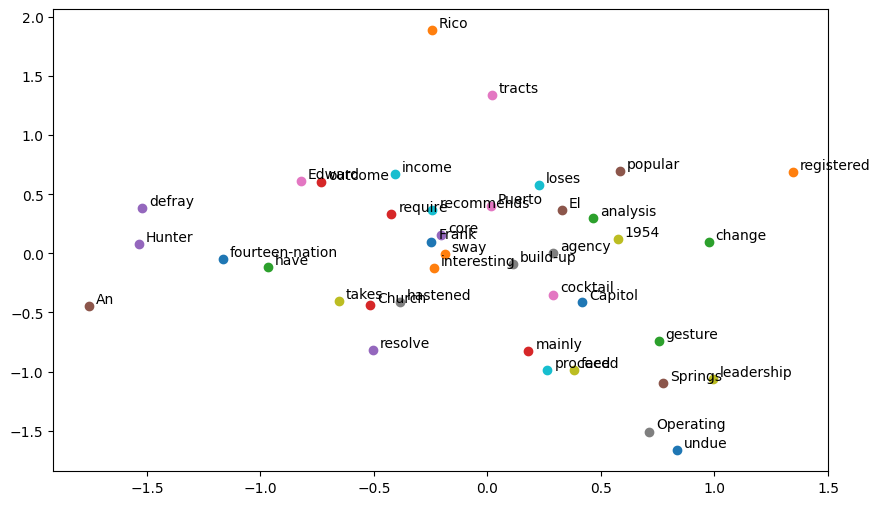

In [32]:
plt.figure(figsize=(10,6))
for i, word in enumerate(vocabs[:40]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 2. GloVe

## Co-occurrence matrix

Count the occurrences of pair of words using window size of 1 (you can use 2, 3, 4, up to you.)

E.g., Dog loves to eat meat.     

['dog', 'loves', 1], ['loves', 'to', 1]

In [33]:
#use Counter to first count stuffs
from collections import Counter

# print(corpus_tokenized)

#count the frequency of each word....
#we somehow need this to calculate the probability Pi
X_i = Counter(flatten(corpus_tokenized)) #merge all list....(flatten is a function I define.....)

# X_i['apple'] #get the probability of apple

In [34]:
#define a skipgram of window size 1
skip_grams = []

#loop through each corpus
for sent in corpus_tokenized:  #['apple', 'banana', 'fruit']
    #loop through each word from 1 to n-1 (because 0 and n has no context window)
    for i in range(1, len(sent)-1):
        target  = sent[i]
        context = [sent[i+1], sent[i-1]]
        #append(i, i+1) and append(i, i-1)
        for c in context:
            skip_grams.append((target, c))

In [35]:
X_ik_skipgram = Counter(skip_grams)
X_ik_skipgram

Counter({('Fulton', 'County'): 6,
         ('Fulton', 'The'): 1,
         ('County', 'Grand'): 1,
         ('County', 'Fulton'): 6,
         ('Grand', 'Jury'): 1,
         ('Grand', 'County'): 1,
         ('Jury', 'said'): 1,
         ('Jury', 'Grand'): 1,
         ('said', 'Friday'): 1,
         ('said', 'Jury'): 1,
         ('Friday', 'an'): 1,
         ('Friday', 'said'): 1,
         ('an', 'investigation'): 2,
         ('an', 'Friday'): 1,
         ('investigation', 'of'): 3,
         ('investigation', 'an'): 2,
         ('of', "Atlanta's"): 1,
         ('of', 'investigation'): 3,
         ("Atlanta's", 'recent'): 1,
         ("Atlanta's", 'of'): 1,
         ('recent', 'primary'): 1,
         ('recent', "Atlanta's"): 1,
         ('primary', 'election'): 2,
         ('primary', 'recent'): 1,
         ('election', 'produced'): 1,
         ('election', 'primary'): 2,
         ('produced', '``'): 1,
         ('produced', 'election'): 1,
         ('``', 'no'): 1,
         ('``', 'produc

## Weighting function f

In [36]:
def weighting(w_i, w_j, X_ik):   #why we need w_i and w_j, because we can try its co-occurrences, if it's too big, we scale it down
    
    #check whether the co-occurrences between these two word exists???
    try:
        x_ij = X_ik[(w_i, w_j)]
    except:
        x_ij = 1  #why one, so that the probability thingy won't break...(label smoothing)
        
    #maximum co-occurrences; we follow the paper
    x_max = 100
    alpha = 0.75
    
    #if the co-occurrences does not exceed x_max, scale it down based on some alpha
    if x_ij < x_max:
        result = (x_ij/x_max) ** alpha
    else:
        result = 1 #this is the maximum probability you can have
        
    return result

In [37]:
w_i  = 'Fulton'
w_j  = 'County'
w_j2 = 'sagun'

print(weighting(w_i, w_j, X_ik_skipgram))   #scales from 1 to 0.0316
print(weighting(w_i, w_j2, X_ik_skipgram))  #the paper says that f(0) = 0

0.12123093028059741
0.0


In [38]:
# tried to use
# import tqdm

In [39]:
#now apply this weighting to all possible pairs
from itertools import combinations_with_replacement

X_ik = {} #for keeping the co-occurrences
weighting_dic = {} #for keeping all the probability after passing through the weighting function

for bigram in combinations_with_replacement(vocabs, 2):  #we need to also think its reverse
    #if this bigram exists in X_ik_skipgrams
    #we gonna add this to our co-occurence matrix
    if X_ik_skipgram.get(bigram) is not None:
        cooc = X_ik_skipgram[bigram]  #get the co-occurrence
        X_ik[bigram] = cooc + 1 #this is again basically label smoothing....(stability issues (especially when divide something))
        X_ik[(bigram[1], bigram[0])] = cooc + 1  #trick to get all pairs
    else: #otherwise, do nothing
        pass
    
    #apply the weighting function using this co-occurrence matrix thingy    
    weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
    weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)
    

In [40]:
len(X_ik_skipgram)

28372

In [41]:
X_ik

{('undue', 'from'): 2,
 ('from', 'undue'): 2,
 ('undue', 'costs'): 2,
 ('costs', 'undue'): 2,
 ('registered', 'voters'): 2,
 ('voters', 'registered'): 2,
 ('registered', 'of'): 2,
 ('of', 'registered'): 2,
 ('have', 'They'): 2,
 ('They', 'have'): 2,
 ('have', 'also'): 2,
 ('also', 'have'): 2,
 ('have', 'more'): 2,
 ('more', 'have'): 2,
 ('have', 'it'): 2,
 ('it', 'have'): 2,
 ('have', 'brought'): 2,
 ('brought', 'have'): 2,
 ('have', 'effective'): 2,
 ('effective', 'have'): 2,
 ('have', 'Both'): 2,
 ('Both', 'have'): 2,
 ('have', 'leaders'): 2,
 ('leaders', 'have'): 2,
 ('have', 'we'): 3,
 ('we', 'have'): 3,
 ('have', "we'll"): 2,
 ("we'll", 'have'): 2,
 ('have', 'at'): 2,
 ('at', 'have'): 2,
 ('have', 'something'): 2,
 ('something', 'have'): 2,
 ('have', 'said'): 3,
 ('said', 'have'): 3,
 ('have', 'attracted'): 2,
 ('attracted', 'have'): 2,
 ('have', 'assumed'): 2,
 ('assumed', 'have'): 2,
 ('have', "can't"): 2,
 ("can't", 'have'): 2,
 ('have', 'police'): 2,
 ('police', 'have'): 2,
 (

###  Prepare train data
You move the window along, and create those tuples as we said in class

In [42]:
for c in corpus_tokenized:
    print(c)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']
['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports

In [43]:
skip_grams

[('Fulton', 'County'),
 ('Fulton', 'The'),
 ('County', 'Grand'),
 ('County', 'Fulton'),
 ('Grand', 'Jury'),
 ('Grand', 'County'),
 ('Jury', 'said'),
 ('Jury', 'Grand'),
 ('said', 'Friday'),
 ('said', 'Jury'),
 ('Friday', 'an'),
 ('Friday', 'said'),
 ('an', 'investigation'),
 ('an', 'Friday'),
 ('investigation', 'of'),
 ('investigation', 'an'),
 ('of', "Atlanta's"),
 ('of', 'investigation'),
 ("Atlanta's", 'recent'),
 ("Atlanta's", 'of'),
 ('recent', 'primary'),
 ('recent', "Atlanta's"),
 ('primary', 'election'),
 ('primary', 'recent'),
 ('election', 'produced'),
 ('election', 'primary'),
 ('produced', '``'),
 ('produced', 'election'),
 ('``', 'no'),
 ('``', 'produced'),
 ('no', 'evidence'),
 ('no', '``'),
 ('evidence', "''"),
 ('evidence', 'no'),
 ("''", 'that'),
 ("''", 'evidence'),
 ('that', 'any'),
 ('that', "''"),
 ('any', 'irregularities'),
 ('any', 'that'),
 ('irregularities', 'took'),
 ('irregularities', 'any'),
 ('took', 'place'),
 ('took', 'irregularities'),
 ('place', '.'),
 

In [44]:
import math

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic):
    
    #loop through this skipgram, and change it id  because when sending model, it must number
    skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in skip_grams]
    
    #randomly pick "batch_size" indexes
    number_of_choices = len(skip_grams_id)
    random_index = np.random.choice(number_of_choices, batch_size, replace=False) #no repeating indexes among these random indexes
    
    random_inputs = [] #xi, wi (in batches)
    random_labels = [] #xj, wj (in batches)
    random_coocs  = [] #Xij (in batches)
    random_weighting = [] #f(Xij) (in batches)
    #for each of the sample in these indexes
    for i in random_index:
        random_inputs.append([skip_grams_id[i][0]]) #same reason why i put bracket here....
        random_labels.append([skip_grams_id[i][1]])
        
        #get cooc
        #first check whether it exists...
        pair = skip_grams[i]  #e.g., ('banana', 'fruit)
        try:
            cooc = X_ik[pair]
        except:
            cooc = 1 #label smoothing
            
        random_coocs.append([math.log(cooc)])  #1. why log, #2, why bracket -> size ==> (, 1)  #my neural network expects (, 1)
        
        #get weighting
        weighting = weighting_dic[pair]  #why not use try....maybe it does not exist....
        random_weighting.append(weighting)

        
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weighting)
    

In [45]:
batch_size = 2
input, target, cooc, weightin = random_batch(batch_size, corpus_tokenized, skip_grams, X_ik, weighting_dic)

In [46]:
input, target, cooc, weightin

(array([[4417],
        [3564]]),
 array([[ 152],
        [4349]]),
 array([[1.60943791],
        [0.69314718]]),
 array([0.10573713, 0.05318296]))

## Model

In [147]:
class GloVe(nn.Module):
    
    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding
        
        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)
        
    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        
        center_bias = self.v_bias(center_words).squeeze(1)
        target_bias = self.u_bias(target_words).squeeze(1)
        
        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2)
        
        return torch.sum(loss)

## Training

In [48]:
voc_size   = len(vocabs)
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
glove_model      = GloVe(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [49]:
num_epochs = 5000
#for epoch
for epoch in range(num_epochs):

    #get random batch
    input, target, cooc, weightin = random_batch(batch_size, corpus_tokenized, skip_grams, X_ik, weighting_dic)
    input_batch    = torch.LongTensor(input)
    target_batch   = torch.LongTensor(target)
    cooc_batch     = torch.FloatTensor(cooc)
    weightin_batch = torch.FloatTensor(weightin)
    
    
    # print(input_batch.shape, label_batch.shape, cooc_batch.shape, weightin_batch)
    
    #loss = model
    loss = glove_model(input_batch, target_batch, cooc_batch, weightin_batch)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1000 | Loss: 0.261544 | Time: ??
Epoch 2000 | Loss: 26.578398 | Time: ??
Epoch 3000 | Loss: 0.158241 | Time: ??
Epoch 4000 | Loss: 2.567272 | Time: ??
Epoch 5000 | Loss: 0.083745 | Time: ??


In [87]:
glove_model.state_dict()

OrderedDict([('embedding_v.weight',
              tensor([[-1.1071, -0.4758],
                      [ 1.0934,  0.7784],
                      [-0.0506,  1.1485],
                      ...,
                      [-0.9460, -0.8497],
                      [-1.6529, -1.5783],
                      [ 0.8946,  1.8060]])),
             ('embedding_u.weight',
              tensor([[ 0.0876, -0.4635],
                      [ 0.0036, -0.9140],
                      [ 0.6537, -0.4092],
                      ...,
                      [-0.7274,  0.7366],
                      [-1.9070,  0.3364],
                      [ 0.4168, -0.3269]])),
             ('v_bias.weight',
              tensor([[-1.8530],
                      [ 0.8865],
                      [-0.7031],
                      ...,
                      [-0.3618],
                      [ 0.5606],
                      [ 1.7175]])),
             ('u_bias.weight',
              tensor([[-0.8927],
                      [-0.5064],
        

## Plot Embeddings

In [54]:
def get_embed(word,model):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_v(word)
    outside_embed = model.embedding_u(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

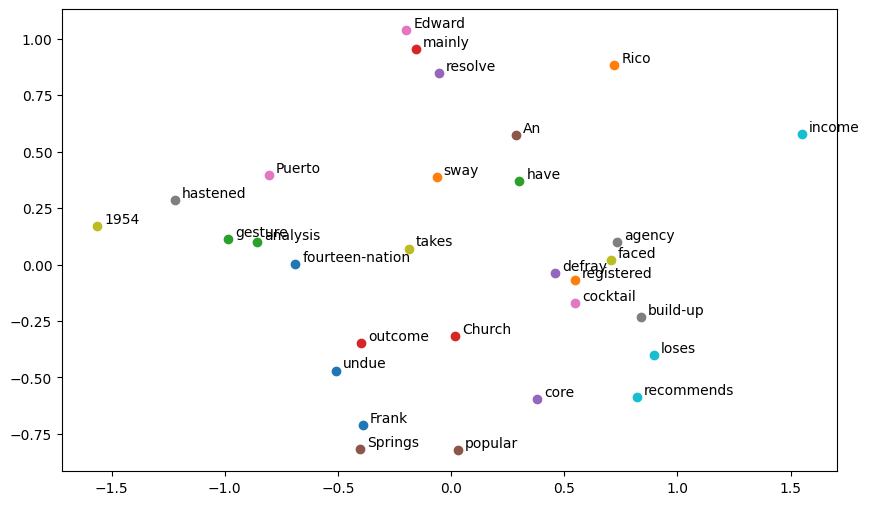

In [184]:
#help me plot fruit cat banana on matplotlib
plt.figure(figsize=(10,6))
for i, word in enumerate(vocabs[:30]): #loop each unique vocab
    x, y = get_embed_glove(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Testing / Inference

In [79]:
## Save models

torch.save(skipgram_model.state_dict(), 'skipgram.pkl')

In [80]:
torch.save(glove_model.state_dict(), 'glove.pkl')

In [86]:
glove_model.state_dict()

OrderedDict([('embedding_v.weight',
              tensor([[-1.1071, -0.4758],
                      [ 1.0934,  0.7784],
                      [-0.0506,  1.1485],
                      ...,
                      [-0.9460, -0.8497],
                      [-1.6529, -1.5783],
                      [ 0.8946,  1.8060]])),
             ('embedding_u.weight',
              tensor([[ 0.0876, -0.4635],
                      [ 0.0036, -0.9140],
                      [ 0.6537, -0.4092],
                      ...,
                      [-0.7274,  0.7366],
                      [-1.9070,  0.3364],
                      [ 0.4168, -0.3269]])),
             ('v_bias.weight',
              tensor([[-1.8530],
                      [ 0.8865],
                      [-0.7031],
                      ...,
                      [-0.3618],
                      [ 0.5606],
                      [ 1.7175]])),
             ('u_bias.weight',
              tensor([[-0.8927],
                      [-0.5064],
        

In [56]:
with open ("data/questions-words.txt", "r") as f:
    test_data = f.read()

In [57]:
test_data

': capital-common-countries\nAthens Greece Baghdad Iraq\nAthens Greece Bangkok Thailand\nAthens Greece Beijing China\nAthens Greece Berlin Germany\nAthens Greece Bern Switzerland\nAthens Greece Cairo Egypt\nAthens Greece Canberra Australia\nAthens Greece Hanoi Vietnam\nAthens Greece Havana Cuba\nAthens Greece Helsinki Finland\nAthens Greece Islamabad Pakistan\nAthens Greece Kabul Afghanistan\nAthens Greece London England\nAthens Greece Madrid Spain\nAthens Greece Moscow Russia\nAthens Greece Oslo Norway\nAthens Greece Ottawa Canada\nAthens Greece Paris France\nAthens Greece Rome Italy\nAthens Greece Stockholm Sweden\nAthens Greece Tehran Iran\nAthens Greece Tokyo Japan\nBaghdad Iraq Bangkok Thailand\nBaghdad Iraq Beijing China\nBaghdad Iraq Berlin Germany\nBaghdad Iraq Bern Switzerland\nBaghdad Iraq Cairo Egypt\nBaghdad Iraq Canberra Australia\nBaghdad Iraq Hanoi Vietnam\nBaghdad Iraq Havana Cuba\nBaghdad Iraq Helsinki Finland\nBaghdad Iraq Islamabad Pakistan\nBaghdad Iraq Kabul Afghan

In [58]:
import re
text = re.split(r"\n", test_data)

In [59]:
type(text)

list

In [60]:
text

[': capital-common-countries',
 'Athens Greece Baghdad Iraq',
 'Athens Greece Bangkok Thailand',
 'Athens Greece Beijing China',
 'Athens Greece Berlin Germany',
 'Athens Greece Bern Switzerland',
 'Athens Greece Cairo Egypt',
 'Athens Greece Canberra Australia',
 'Athens Greece Hanoi Vietnam',
 'Athens Greece Havana Cuba',
 'Athens Greece Helsinki Finland',
 'Athens Greece Islamabad Pakistan',
 'Athens Greece Kabul Afghanistan',
 'Athens Greece London England',
 'Athens Greece Madrid Spain',
 'Athens Greece Moscow Russia',
 'Athens Greece Oslo Norway',
 'Athens Greece Ottawa Canada',
 'Athens Greece Paris France',
 'Athens Greece Rome Italy',
 'Athens Greece Stockholm Sweden',
 'Athens Greece Tehran Iran',
 'Athens Greece Tokyo Japan',
 'Baghdad Iraq Bangkok Thailand',
 'Baghdad Iraq Beijing China',
 'Baghdad Iraq Berlin Germany',
 'Baghdad Iraq Bern Switzerland',
 'Baghdad Iraq Cairo Egypt',
 'Baghdad Iraq Canberra Australia',
 'Baghdad Iraq Hanoi Vietnam',
 'Baghdad Iraq Havana Cuba

In [63]:
for idx,x in enumerate(text):
    if ':' in x:
        print(x,idx)

: capital-common-countries 0
: capital-world 507
: currency 5032
: city-in-state 5899
: family 8367
: gram1-adjective-to-adverb 8874
: gram2-opposite 9867
: gram3-comparative 10680
: gram4-superlative 12013
: gram5-present-participle 13136
: gram6-nationality-adjective 14193
: gram7-past-tense 15793
: gram8-plural 17354
: gram9-plural-verbs 18687


In [64]:
syntatic = text[0:506]
syntatic = [
    item for item in syntatic if not item.lower().startswith(':')
]

In [65]:
syntatic[0]

'Athens Greece Baghdad Iraq'

In [66]:
semantic = text[8874:9867]
semantic = [
    item for item in semantic if not item.lower().startswith(':')
]

In [67]:
semantic[0]

'amazing amazingly apparent apparently'

In [68]:
semantic[0:5]

['amazing amazingly apparent apparently',
 'amazing amazingly calm calmly',
 'amazing amazingly cheerful cheerfully',
 'amazing amazingly complete completely',
 'amazing amazingly efficient efficiently']

In [69]:
corpus_tokenized[0:5]

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['The',
  'September-October',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'Fulton',
  'Superior',
  'Court',
  'Judge',
  'Durwood',
  'Pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  '``',
  'irregularities',
  "''",
 

In [70]:
test_corpus_tokenized_semantic = [sent.split(" ") for sent in semantic]
test_corpus_tokenized_syntatic = [sent.split(" ") for sent in syntatic]

In [71]:
test_corpus_tokenized_semantic[:5]

[['amazing', 'amazingly', 'apparent', 'apparently'],
 ['amazing', 'amazingly', 'calm', 'calmly'],
 ['amazing', 'amazingly', 'cheerful', 'cheerfully'],
 ['amazing', 'amazingly', 'complete', 'completely'],
 ['amazing', 'amazingly', 'efficient', 'efficiently']]

In [72]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs_semantic  = list(set(flatten(test_corpus_tokenized_semantic)))

In [73]:
len(vocabs_semantic)

64

In [74]:
vocabs_syntatic  = list(set(flatten(test_corpus_tokenized_syntatic)))

In [75]:
len(vocabs_syntatic)

46

In [76]:
word2index_syntatic = {v: idx for idx, v in enumerate(vocabs_syntatic)}
word2index_semantic = {v: idx for idx, v in enumerate(vocabs_semantic)}

In [77]:
word2index_semantic['amazing']

14

In [126]:
semantic_data = pd.DataFrame(test_corpus_tokenized_semantic, columns=["Col1", "Col2", "Col3", "Col4"])
semantic_data.shape
semantic_data

Col1       Col2         Col3           Col4
0    amazing  amazingly     apparent     apparently
1    amazing  amazingly         calm         calmly
2    amazing  amazingly     cheerful     cheerfully
3    amazing  amazingly     complete     completely
4    amazing  amazingly    efficient    efficiently
..       ...        ...          ...            ...
987    usual    usually         slow         slowly
988    usual    usually       sudden       suddenly
989    usual    usually        swift        swiftly
990    usual    usually      typical      typically
991    usual    usually  unfortunate  unfortunately

[992 rows x 4 columns]

In [125]:
syntatic_data = pd.DataFrame(test_corpus_tokenized_syntatic, columns=["Col1", "Col2", "Col3", "Col4"])
syntatic_data

Col1    Col2       Col3         Col4
0    Athens  Greece    Baghdad         Iraq
1    Athens  Greece    Bangkok     Thailand
2    Athens  Greece    Beijing        China
3    Athens  Greece     Berlin      Germany
4    Athens  Greece       Bern  Switzerland
..      ...     ...        ...          ...
500   Tokyo   Japan       Oslo       Norway
501   Tokyo   Japan     Ottawa       Canada
502   Tokyo   Japan      Paris       France
503   Tokyo   Japan       Rome        Italy
504   Tokyo   Japan  Stockholm       Sweden

[505 rows x 4 columns]

In [194]:
from numpy.linalg import norm
from numpy import dot
# inspired by guntsvzz github

def find_analogy(word1,word2,word3,model,vocabs):
    word1_embedding, word2_embedding, word3_embedding = get_embed_glove(word1),get_embed_glove(word2),get_embed_glove(word3)
    vector = word2_embedding - word1_embedding + word3_embedding
    #initial similarity set to -1 
    #will update this as anything gets more than this
    similarity = -1 
    
    for vocab in vocabs:
#         if the word is not among these
        if vocab not in [word1,word2,word3]:
#             getting the similarity between words
            current_similarity = dot(vector, get_embed_glove(vocab))/(norm(vector)*norm(get_embed_glove(vocab)))
    
            if current_similarity > similarity:
                #update the higher similarity to be sent
                similarity = current_similarity 
                d = (vocab, similarity)
    return d

In [195]:
def get_embed_glove(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_v(word)
    outside_embed = model.embedding_u(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return np.array(embed[0].detach().numpy())

In [196]:
# for each_model in load_models:
#     print(find_analogy('usual', 'usually', 'serious', each_model))
find_analogy('Athens','Greece','Baghdad',glove_model,vocabs_syntatic)

#################### wrong prediction ###############################

('Berlin', 0.8446809)

In [176]:
find_analogy('Tokyo','Japan','Ottawa',glove_model,vocabs_syntatic)

#################### wrong prediction ###############################

('Egypt', 0.99999994)

In [177]:
find_analogy('Tokyo','Japan','Cairo',glove_model,vocabs_syntatic)

#################### correct prediction ###############################

('Egypt', 0.99999994)

In [223]:
find_analogy('amazing','amazingly','apparant',glove_model,vocabs_semantic)

#################### wrong prediction ###############################

('furious', 0.99999994)

In [225]:
find_analogy('amazing','amazingly','furiously',glove_model,vocabs_semantic)

#################### correct prediction ###############################

('furious', 0.99999994)

In [232]:
find_analogy('usual','usually','typically',glove_model,vocabs_semantic)

#################### wrong prediction ###############################

('immediate', 0.98561954)

**!!Two embeddings are same!!**

In [181]:

get_embed_glove('Ottawa'),get_embed_glove('Cairo'),get_embed_glove('Greece')

(array([0.6556631, 0.7395632], dtype=float32),
 array([0.6556631, 0.7395632], dtype=float32),
 array([ 0.09377795, -0.4833691 ], dtype=float32))

In [209]:
def tes__ting(data,model,vocab):  
    corrects = 0
    total = len(data)
    for idx, row in data.iterrows():
        a, b, c, d = row['Col1'],row['Col2'],row['Col3'],row['Col4']
        predict = find_analogy(a,b,c,model,vocab)[0] 
        if predict == d: 
            corrects +=1 
    acc = corrects/total
    return acc

In [210]:
semantic_accuracy_glove = testing(semantic_data,glove_model,vocabs_semantic)

In [213]:
syntatic_accuracy_glove = testing(syntatic_data,glove_model,vocabs_syntatic)

In [221]:
print(f'Glove Semantic Accuracy : {semantic_accuracy_glove * 100}')
print(f'Glove Syntatic Accuracy : {syntatic_accuracy_glove * 100}')


Glove Semantic Accuracy : 0.9072580645161291
Glove Syntatic Accuracy : 3.564356435643564
